In [4]:
! mkrdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

/bin/bash: line 1: mkrdir: command not found
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
100% 1.76G/1.76G [01:23<00:00, 23.5MB/s]
100% 1.76G/1.76G [01:23<00:00, 22.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('lung-and-colon-cancer-histopathological-images.zip','r')
zip_ref.extractall()
zip_ref.close()

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing import image
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
def load_data(path):

  images=[]
  label=[]

  categories=os.listdir(path)

  for category in categories:

    category_path=os.path.join(path,category)
    for image in os.listdir(category_path):

      img=cv2.imread(os.path.join(category_path,image))
      img=cv2.resize(img,(224,224))
      images.append(img)
      label.append(category)

  images=np.array(images)
  label=np.array(label)

  le=LabelEncoder()
  label=le.fit_transform(label)
  return images,label

In [9]:
#Load Data
x, y = load_data('/content/lung_colon_image_set/lung_image_sets')

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# Model

model1 = Sequential()

base_model1 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model1.trainable=False

model1.add(base_model1)
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(1024,activation='relu'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())
model1.add(Dense(4,activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [13]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='logs')
]

In [14]:
history1 = model1.fit(x_train, y_train, epochs=15, validation_split=0.2, shuffle=True, callbacks=callbacks, steps_per_epoch = 100 )

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9166

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 75s 532ms/step - loss: 0.2290 - accuracy: 0.9166 - val_loss: 0.1504 - val_accuracy: 0.9517 - lr: 0.0010
Epoch 2/15
100/100 [==============================] - 50s 502ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.1077 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 3/15
100/100 [==============================] - 49s 493ms/step - loss: 0.0263 - accuracy: 0.9909 - val_loss: 0.0900 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 4/15
100/100 [==============================] - 49s 496ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.1031 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 5/15
100/100 [==============================] - 49s 494ms/step - loss: 0.0127 - accuracy: 0.9951 - val_loss: 0.1096 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 6/15
100/100 [==============================] - 49s 496ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0934 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 7/15
100/100 [==============================] - 49s 488ms

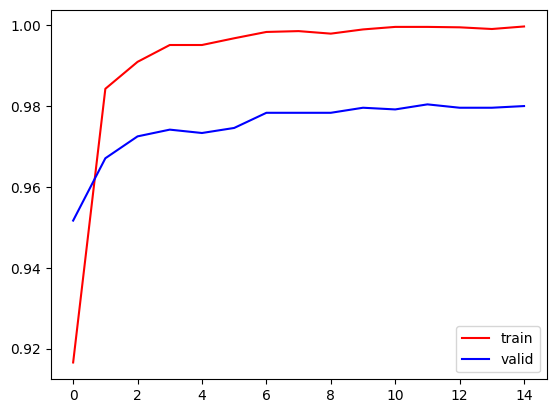

In [15]:
plt.plot(history1.history['accuracy'], color='red', label='train')
plt.plot(history1.history['val_accuracy'], color='blue', label='valid')
plt.legend()
plt.show()

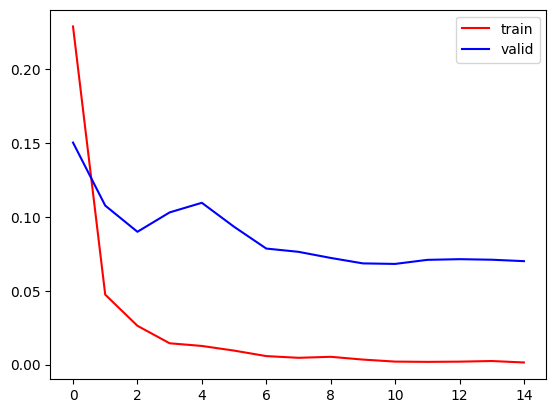

In [16]:
plt.plot(history1.history['loss'], color='red', label='train')
plt.plot(history1.history['val_loss'], color='blue', label='valid')
plt.legend()
plt.show()

In [17]:
y_pred = model1.predict(x_test)
predictions = np.argmax(y_pred, axis=1)
print(classification_report(y_test,predictions))

94/94 [==============================] - 17s 182ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1037
           1       1.00      1.00      1.00       970
           2       0.96      0.98      0.97       993

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



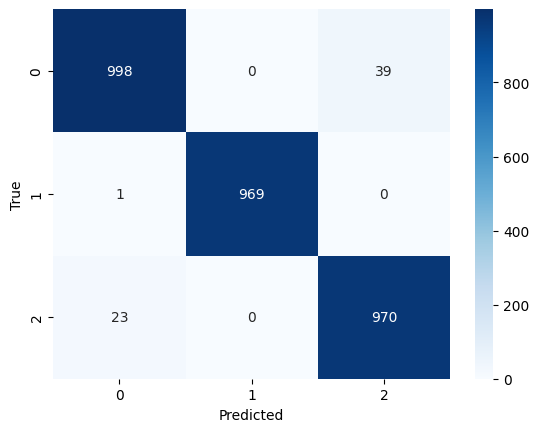

In [18]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
def prediction(test_input):

  return np.argmax(model1.predict(test_input), axis=1)

In [20]:
def Lung_Cancer_Detector(input_path):

  img=cv2.imread(input_path)
  img=cv2.resize(img,(224,224))
  image=np.array(img)
  pred = prediction(image)

  if pred==0:
    print("Lung adenocarcinoma")
  elif pred==1:
    print("Lung benign tissue")
  else:
    print("Lung squamous cell carcinoma")